In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/My Drive/OIL/oildata.csv')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Convert Effective date type to datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Remove timezone from effective date column
# df['DATE'] = pd.to_datetime(df['DATE']).dt.tz_localize(None)
df.head(2)

,DATE,DCOILWTICO
0,2019-05-30,56.47
1,2019-05-31,53.49


In [ ]:
df['ds'] = df['DATE']
df['y'] = df['DCOILWTICO']
train_data = df.iloc[:1100]  # First 770 entries as training
test_data = df.iloc[1100:]

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the Prophet model and fit it on the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the training set
forecast_train = model.predict(train_data)
y_pred_train = forecast_train['yhat']
y_train = train_data['y']

# Calculate MSE and RMSE for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Make predictions on the test set
forecast_test = model.predict(test_data)
y_pred_test = forecast_test['yhat']
y_test = test_data['y']

# Calculate MSE and RMSE for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjip6iord/b1pd1cej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjip6iord/q60b40u5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19591', 'data', 'file=/tmp/tmpjip6iord/b1pd1cej.json', 'init=/tmp/tmpjip6iord/q60b40u5.json', 'output', 'file=/tmp/tmpjip6iord/prophet_model72vcjh65/prophet_model-20241026102326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Train MSE: 30.71605715913456, Train RMSE: 5.542206885270033
Test MSE: 35.40906011606353, Test RMSE: 5.9505512447220825


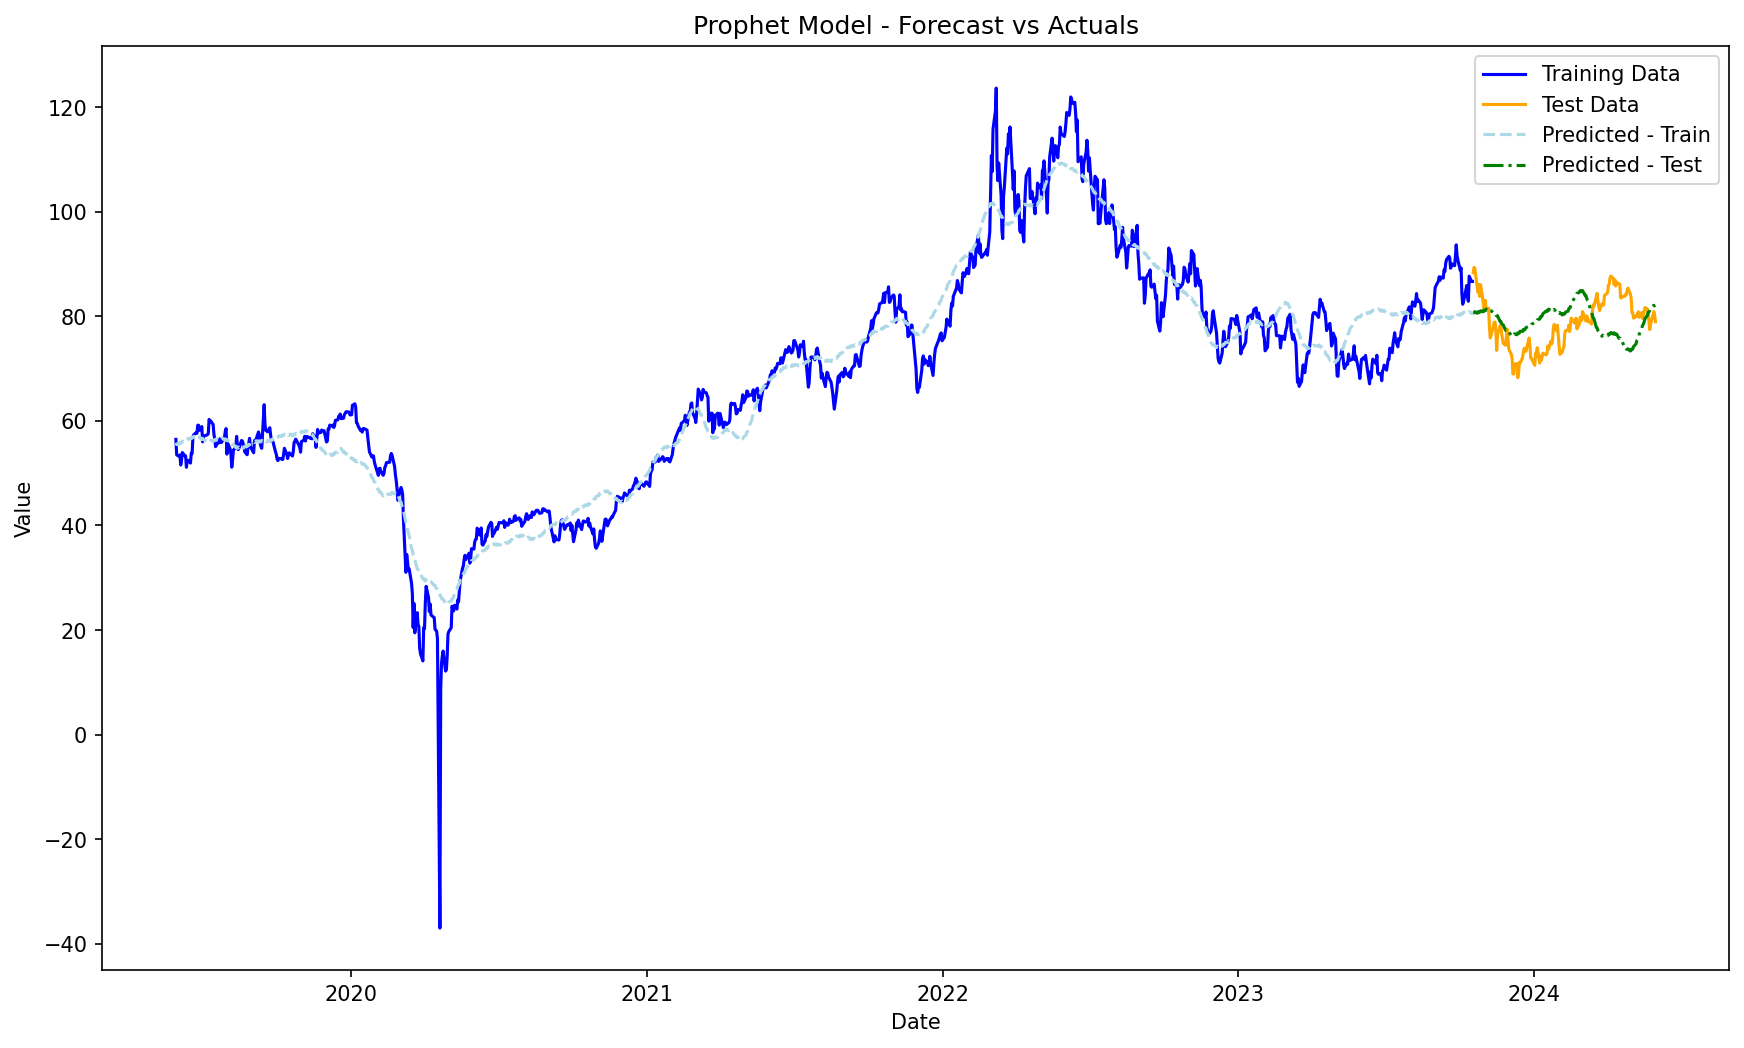

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14, 8),dpi=150)

# Plot the actual values for training and test sets
plt.plot(train_data['ds'], y_train, label='Training Data', color='blue')
plt.plot(test_data['ds'], y_test, label='Test Data', color='orange')

# Plot the predictions
plt.plot(train_data['ds'], y_pred_train, label='Predicted - Train', linestyle='--', color='lightblue')
plt.plot(test_data['ds'], y_pred_test, label='Predicted - Test', linestyle='dashdot', color='green')

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model - Forecast vs Actuals')
plt.legend()

# Show the plot
plt.show()
